# Лабораторная работа 1
## Неклюдов Борис 165

In [3]:
import sympy as sp

In [4]:
a, b, c, d, k, x, y = sp.symbols("a, b, c, d, k, x, y")

In [5]:
f = a*x - k*x**2 - b*x*y
g = c*x*y - d*y

 Первое уравнение

In [6]:
f

a*x - b*x*y - k*x**2

Второе уравнение

In [7]:
g

c*x*y - d*y

In [8]:
eq_points = sp.solve([f,g], [x,y])
eq_points

[(0, 0), (a/k, 0), (d/c, (a*c - d*k)/(b*c))]

Три точки равновесия: (0;0), (a/k, 0), (d/c, $(a*c - d*k)\over (b*c)$). 
# Проверим их тип    
Первая точка (0;0)

In [10]:
L11 = sp.diff(f,x).subs(zip((x,y), eq_points[0]))
L12 = sp.diff(f,y).subs(zip((x,y), eq_points[0]))
L21 = sp.diff(g,x).subs(zip((x,y), eq_points[0]))
L22 = sp.diff(g,y).subs(zip((x,y), eq_points[0]))

In [11]:
L = sp.Matrix([[L11, L12], [L21,L22]])
L

Matrix([
[a,  0],
[0, -d]])

In [12]:
L.eigenvals()

{a: 1, -d: 1}

Вывод по первой точке:  
действительные значения разных знаков, поэтому *седло*, то есть **неустойчивое** равновесие    
Вторая точка (а/к; 0)

In [13]:
L11 = sp.diff(f,x).subs(zip((x,y), eq_points[1]))
L12 = sp.diff(f,y).subs(zip((x,y), eq_points[1]))
L21 = sp.diff(g,x).subs(zip((x,y), eq_points[1]))
L22 = sp.diff(g,y).subs(zip((x,y), eq_points[1]))
L = sp.Matrix([[L11, L12], [L21,L22]])
L

Matrix([
[-a,    -a*b/k],
[ 0, a*c/k - d]])

In [14]:
L.eigenvals()

{-a: 1, a*c/k - d: 1}

Вывод по второй точке:  
если $ {a*c\over k} > d $, то действительные значения разных знаков, поэтому *седло*, то есть **неустойчивое** равновесие;    
если $ {a*c\over k} < d $, то действительные значения отрицательные, поэтому **устойчивый** *узел*  
Третья точка (d/c, $(a*c - d*k)\over (b*c)$)


In [15]:
L11 = sp.diff(f,x).subs(zip((x,y), eq_points[2]))
L12 = sp.diff(f,y).subs(zip((x,y), eq_points[2]))
L21 = sp.diff(g,x).subs(zip((x,y), eq_points[2]))
L22 = sp.diff(g,y).subs(zip((x,y), eq_points[2]))
L = sp.Matrix([[L11, L12], [L21,L22]])
L

Matrix([
[a - 2*d*k/c - (a*c - d*k)/c, -b*d/c],
[              (a*c - d*k)/b,      0]])

In [16]:
L.eigenvals()

{-d*k/(2*c) - sqrt(-d*(4*a*c**2 - 4*c*d*k - d*k**2))/(2*c): 1,
 -d*k/(2*c) + sqrt(-d*(4*a*c**2 - 4*c*d*k - d*k**2))/(2*c): 1}

Вывод по третьей точке:  
если собственные значения комлпексны, то у них одинаковая *отрицательная* реальная частью, поэтому **устойчивый** *фокус*  
если реальные, то при разных знаках действительных корней будет *седло*, а при одинаковых – узел (положительные – неустойчивый, отрицательный – устойчивый)
# Фазовые портреты

In [17]:
py_f = sp.lambdify((x,y), f.subs([(a,3), (b,0.6), (k, 0.2)]))
py_g = sp.lambdify((x,y), g.subs([(c,0.2), (d,2)]))

In [18]:
import numpy as np
import matplotlib.pyplot as plt

In [28]:
X= np.arange(-3,20,1)
Y = np.arange(-3,9,1)

In [29]:
X, Y = np.meshgrid(X,Y)

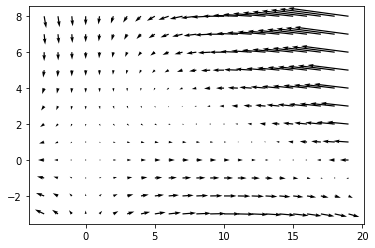

In [30]:
U = py_f(X,Y)
V = py_g(X,Y)

fig, ax = plt.subplots()
q= ax.quiver(X,Y,U,V)

plt.show()

На графике видно, что точка (0;0) неустойчивое равновесие, а точнее седло  
Вторая точка (15; 0) это также седло (внизу видно изменение направления), то есть неустойчивое равновесие при таких условиях, так как $ {a*c\over k} > d $  
Третья точка (10; 5/3) это устойчивый фокус